# MarkSix (Hong Kong Powerball)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from functools import reduce
from scipy import stats
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
!jupyter lab --version
!python --version
%load_ext jupyter_ai_magics

4.3.5
Python 3.13.1


# Data overview

In [3]:
df = pd.read_csv('Mark_Six.csv')
df.rename(columns={'Winning Number 1':'1'}, inplace=True)
#1st 20 columns
df_1sthalf=df.iloc[::,0:19]
#the rest
df_2ndhalf=df.iloc[::,19:34]
df_chi = pd.read_csv('Mark_Six_chinese.csv')
df_1sthalf.head()

,Draw,Date,1,2,3,4,5,6,Extra Number,From Last,Low,High,Odd,Even,1-10,11-20,21-30,31-40,41-50
0,25/011,2025-02-02,14,18,30,36,40,42,1,"14,36",2,4,0,6,0,2,1,2,1
1,25/010,2025-01-25,7,14,19,31,36,45,24,NaN,3,3,4,2,1,2,0,2,1
2,25/009,2025-01-23,3,6,24,25,34,37,45,NaN,3,3,3,3,2,0,2,2,0
3,25/008,2025-01-21,16,22,33,43,48,49,8,NaN,2,4,3,3,0,1,1,1,3
4,25/007,2025-01-18,3,4,6,12,18,32,28,"3,4",5,1,1,5,3,2,0,1,0


In [43]:
df_chi.iloc[::,0:19].head()

,期數,日期,中獎號碼 1,2,3,4,5,6,特別號碼,上期出現號碼,小,大,單數,雙數,1-10,11-20,21-30,31-40,41-50
0,25/011,2025-02-02,14,18,30,36,40,42,1,"14,36",2,4,0,6,0,2,1,2,1
1,25/010,2025-01-25,7,14,19,31,36,45,24,NaN,3,3,4,2,1,2,0,2,1
2,25/009,2025-01-23,3,6,24,25,34,37,45,NaN,3,3,3,3,2,0,2,2,0
3,25/008,2025-01-21,16,22,33,43,48,49,8,NaN,2,4,3,3,0,1,1,1,3
4,25/007,2025-01-18,3,4,6,12,18,32,28,"3,4",5,1,1,5,3,2,0,1,0


In [40]:
#the rest of the columns
df_2ndhalf.head()

,Division 1 Winners,Division 1 Prize,Division 2 Winners,Division 2 Prize,Division 3 Winners,Division 3 Prize,Division 4 Winners,Division 4 Prize,Division 5 Winners,Division 5 Prize,Division 6 Winners,Division 6 Prize,Division 7 Winners,Division 7 Prize,Turnover
0,1.0,193762620.0,12.0,1215620.0,536.5,72500.0,1358.0,9600.0,29767.6,640.0,42866.3,320.0,569761.9,40.0,380697962
1,2.0,7578090.0,1.0,1580300.0,62.0,84960.0,204.5,9600.0,3961.2,640.0,5473.9,320.0,75878.0,40.0,51547722
2,0.0,0.0,0.5,834970.0,50.5,88180.0,127.0,9600.0,3505.7,640.0,4022.2,320.0,72790.4,40.0,43343702
3,1.0,24588320.0,3.0,873060.0,116.5,59950.0,365.0,9600.0,6223.0,640.0,9706.5,320.0,108389.9,40.0,71603316
4,0.5,16730720.0,6.0,346480.0,268.0,20680.0,649.5,9600.0,11180.2,640.0,14642.0,320.0,164579.8,40.0,70509097


In [41]:
df_chi.iloc[::, 19:34].head()

,頭獎 中獎注數,頭獎 每注獎金,二獎 中獎注數,二獎 每注獎金,三獎 中獎注數,三獎 每注獎金,四獎 中獎注數,四獎 每注獎金,五獎 中獎注數,五獎 每注獎金,六獎 中獎注數,六獎 每注獎金,七獎 中獎注數,七獎 每注獎金,總投注額
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,380697962
1,2.0,7578090.0,1.0,1580300.0,62.0,84960.0,204.5,9600.0,3961.2,640.0,5473.9,320.0,75878.0,40.0,51547722
2,0.0,0.0,0.5,834970.0,50.5,88180.0,127.0,9600.0,3505.7,640.0,4022.2,320.0,72790.4,40.0,43343702
3,1.0,24588320.0,3.0,873060.0,116.5,59950.0,365.0,9600.0,6223.0,640.0,9706.5,320.0,108389.9,40.0,71603316
4,0.5,16730720.0,6.0,346480.0,268.0,20680.0,649.5,9600.0,11180.2,640.0,14642.0,320.0,164579.8,40.0,70509097


In [52]:
df_1sthalf.describe()

,1,2,3,4,5,6,Extra Number,Low,High,Odd,Even,1-10,11-20,21-30,31-40,41-50
count,2375.000000,2375.000000,2375.000000,2375.000000,2375.000000,2375.000000,2375.000000,2375.000000,2375.000000,2375.000000,2375.000000,2375.000000,2375.000000,2375.000000,2375.000000,2375.000000
mean,7.116211,13.978947,21.337684,28.452211,35.544000,42.768842,24.741474,2.968421,3.031579,3.010947,2.989053,1.232000,1.234947,1.240421,1.212211,1.080421
std,5.739498,7.180749,8.042934,8.068742,7.500889,6.014168,14.260178,1.152016,1.152016,1.144511,1.144511,0.949697,0.957588,0.941355,0.938515,0.889336
min,1.000000,2.000000,3.000000,4.000000,7.000000,10.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,8.000000,15.000000,23.000000,31.000000,40.000000,12.000000,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,1.000000,1.000000,0.000000
50%,6.000000,13.000000,21.000000,29.000000,36.000000,45.000000,25.000000,3.000000,3.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000
75%,10.000000,19.000000,27.000000,34.000000,41.000000,47.000000,37.000000,4.000000,4.000000,4.000000,4.000000,2.000000,2.000000,2.000000,2.000000,2.000000
max,33.000000,39.000000,44.000000,47.000000,48.000000,49.000000,49.000000,6.000000,6.000000,6.000000,6.000000,6.000000,5.000000,5.000000,5.000000,4.000000


In [42]:
df_2ndhalf.describe()

,Division 1 Winners,Division 1 Prize,Division 2 Winners,Division 2 Prize,Division 3 Winners,Division 3 Prize,Division 4 Winners,Division 4 Prize,Division 5 Winners,Division 5 Prize,Division 6 Winners,Division 6 Prize,Division 7 Winners,Division 7 Prize,Turnover
count,2374.000000,2.374000e+03,2374.000000,2.374000e+03,2374.000000,2374.000000,2374.000000,2374.000000,2374.000000,2374.000000,2374.000000,2374.000000,2374.000000,2374.000000,2.375000e+03
mean,0.458804,7.806728e+06,2.680329,9.729598e+05,109.905518,71748.342460,268.823252,8726.537489,5516.920345,581.769166,7308.571693,290.884583,97371.130244,36.360573,5.176081e+07
std,0.938907,1.568706e+07,3.639066,7.539880e+05,104.340654,33338.690143,203.884085,1852.330583,3944.687817,123.488706,4975.249698,61.744353,65011.817943,7.718044,3.421071e+07
min,0.000000,0.000000e+00,0.000000,0.000000e+00,17.000000,9600.000000,57.000000,4800.000000,1446.200000,320.000000,2153.500000,160.000000,31431.500000,20.000000,2.121556e+07
25%,0.000000,0.000000e+00,1.000000,4.011875e+05,59.000000,44960.000000,151.000000,9600.000000,3311.250000,640.000000,4440.025000,320.000000,62158.500000,40.000000,3.528063e+07
50%,0.000000,0.000000e+00,2.000000,8.447450e+05,80.000000,70520.000000,205.250000,9600.000000,4352.500000,640.000000,5818.500000,320.000000,78366.100000,40.000000,4.278190e+07
75%,1.000000,9.106724e+06,3.500000,1.453249e+06,124.000000,94865.000000,305.875000,9600.000000,6125.000000,640.000000,8133.400000,320.000000,105726.750000,40.000000,5.428350e+07
max,23.500000,1.937626e+08,104.700000,5.541450e+06,2470.000000,249250.000000,2042.600000,9600.000000,43397.000000,640.000000,54231.200000,320.000000,732713.600000,40.000000,4.463953e+08


In [53]:
df_1sthalf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2375 entries, 0 to 2374
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Draw          2375 non-null   object
 1   Date          2375 non-null   object
 2   1             2375 non-null   int64 
 3   2             2375 non-null   int64 
 4   3             2375 non-null   int64 
 5   4             2375 non-null   int64 
 6   5             2375 non-null   int64 
 7   6             2375 non-null   int64 
 8   Extra Number  2375 non-null   int64 
 9   From Last     1323 non-null   object
 10  Low           2375 non-null   int64 
 11  High          2375 non-null   int64 
 12  Odd           2375 non-null   int64 
 13  Even          2375 non-null   int64 
 14  1-10          2375 non-null   int64 
 15  11-20         2375 non-null   int64 
 16  21-30         2375 non-null   int64 
 17  31-40         2375 non-null   int64 
 18  41-50         2375 non-null   int64 
dtypes: int

In [44]:
df_2ndhalf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2375 entries, 0 to 2374
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Division 1 Winners  2374 non-null   float64
 1   Division 1 Prize    2374 non-null   float64
 2   Division 2 Winners  2374 non-null   float64
 3   Division 2 Prize    2374 non-null   float64
 4   Division 3 Winners  2374 non-null   float64
 5   Division 3 Prize    2374 non-null   float64
 6   Division 4 Winners  2374 non-null   float64
 7   Division 4 Prize    2374 non-null   float64
 8   Division 5 Winners  2374 non-null   float64
 9   Division 5 Prize    2374 non-null   float64
 10  Division 6 Winners  2374 non-null   float64
 11  Division 6 Prize    2374 non-null   float64
 12  Division 7 Winners  2374 non-null   float64
 13  Division 7 Prize    2374 non-null   float64
 14  Turnover            2375 non-null   int64  
dtypes: float64(14), int64(1)
memory usage: 278.4 KB


In [82]:
df_1sthalf.isnull().any()

Draw                 False
Date                 False
1                    False
2                    False
3                    False
4                    False
5                    False
6                    False
Extra Number         False
From Last             True
Low                  False
High                 False
Odd                  False
Even                 False
1-10                 False
11-20                False
21-30                False
31-40                False
41-50                False
Extra Number Even    False
dtype: bool

# Feature Engineering

### Are Low, High, Odd, Even the effective features for predicting MarkSix?

In [65]:
#the default low, high, odd and even does not include the extra number
low_percent=(df_1sthalf['Low'].sum()/6/2374)*100
high_percent=(df_1sthalf['High'].sum()/6/2374)*100
odd_percent=(df_1sthalf['Odd'].sum()/6/2374)*100
even_percent=(df_1sthalf['Even'].sum()/6/2374)*100

print(low_percent, high_percent, odd_percent, even_percent)

49.49452401010952 50.54759898904801 50.20359449592811 49.83852850322943


In [339]:
#what about the low, high, odd and even for the extra number?

#1 = even number, 0 = odd number
df_1sthalf['Extra Number Even']=df_1sthalf['Extra Number'].apply(lambda x: 1 if x % 2 == 0 else 0)

print((df_1sthalf['Extra Number Even'].value_counts()/2374)*100)
print('Grouping numbers with low, High, Odd and Even do not seem to be the effective features.')

Extra Number Even
0    50.084246
1    49.957877
Name: count, dtype: float64
Low, High, Odd and Even do not seem to be the effective features.


### Grouping the numbers into 7 groups
### 1-7, 8-14, 15-21, 22-28, 29-35, 36-42, 43-49
### Would these groups be a good factor for predicting MarkSix?

In [40]:
# since there are 49 numbers, we are going to make 7 numbers in a group,  groups in total
df_1sthalf['1-7'] = (df_1sthalf.iloc[:,2:8] <= 7).sum(axis=1)
df_1sthalf['8-14'] = ((df_1sthalf.iloc[:,2:8] > 7) & (df_1sthalf.iloc[:,2:8] <= 14)).sum(axis=1)
df_1sthalf['15-21'] = ((df_1sthalf.iloc[:,2:8] > 14) & (df_1sthalf.iloc[:,2:8] <= 21)).sum(axis=1)
df_1sthalf['22-28'] = ((df_1sthalf.iloc[:,2:8] > 21) & (df_1sthalf.iloc[:,2:8] <= 28)).sum(axis=1)
df_1sthalf['29-35'] = ((df_1sthalf.iloc[:,2:8] > 28) & (df_1sthalf.iloc[:,2:8] <= 35)).sum(axis=1)
df_1sthalf['36-42'] = ((df_1sthalf.iloc[:,2:8] > 35) & (df_1sthalf.iloc[:,2:8] <= 42)).sum(axis=1)
df_1sthalf['43-49'] = ((df_1sthalf.iloc[:,2:8] > 42) & (df_1sthalf.iloc[:,2:8] <= 49)).sum(axis=1)

In [42]:
df_7_dis=df_1sthalf[['1-7','8-14','15-21', '22-28','29-35','36-42','43-49']].sum()
df_7_dis=df_7_dis.reset_index(name='dis')
df_7_dis

,index,dis
0,1-7,2047
1,8-14,2045
2,15-21,2071
3,22-28,2020
4,29-35,2120
5,36-42,1919
6,43-49,2028


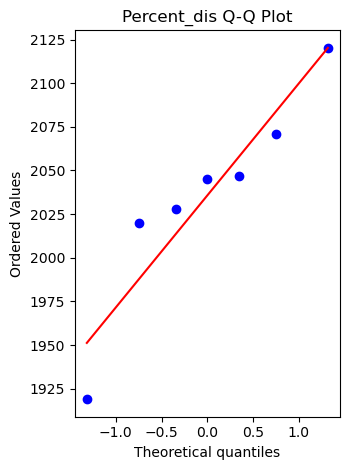

Shapiro-Wilk Test Statistic: 0.9140267695163348, p-value: 0.42445770867332266
The data is normally distributed (fail to reject H0).


In [93]:
#Are the numbers normally distributed?
data=df_7_dis['dis']

# Step 1: Q-Q Plot
plt.subplot(1, 2, 2)
stats.probplot(data, dist="norm", plot=plt)
plt.title('Percent_dis Q-Q Plot')

plt.tight_layout()
plt.show()

# Step 2: Shapiro-Wilk Test
shapiro_stat, shapiro_p = stats.shapiro(data)
print(f'Shapiro-Wilk Test Statistic: {shapiro_stat}, p-value: {shapiro_p}')

# Interpretation of the p-value
alpha = 0.01
if shapiro_p > alpha:
    print("The data is normally distributed (fail to reject H0).")
else:
    print("The data is not normally distributed (reject H0).")

In [94]:
# t-test for df_10_percent_dis
data = df_7_dis['dis']
name = df_7_dis['index']

# Function to perform one-sample t-test
def perform_ttest(value):
    t_stat, p_value = stats.ttest_1samp(data, value)
    return (value, t_stat, p_value)

# Use reduce to apply the t-test to each value in the data
results = [perform_ttest(value) for value in data]

# Print results
num=0
for value, t_stat, p_value in results:
    print(f"For {name[num]}")
    print(f"Comparing value {value} against the group mean:")
    print(f"  t-statistic: {t_stat:.4f}")
    print(f"  p-value: {p_value:.4f}")
    num+=1
    
    if p_value > 0.05:
        print("  Fail to reject the null hypothesis (H0): Not significantly different from the mean.\n")
    else:
        print("  Reject the null hypothesis (H0): Significantly different from the mean.\n")

For 1-7
Comparing value 2047 against the group mean:
  t-statistic: -0.4877
  p-value: 0.6431
  Fail to reject the null hypothesis (H0): Not significantly different from the mean.

For 8-14
Comparing value 2045 against the group mean:
  t-statistic: -0.4013
  p-value: 0.7021
  Fail to reject the null hypothesis (H0): Not significantly different from the mean.

For 15-21
Comparing value 2071 against the group mean:
  t-statistic: -1.5248
  p-value: 0.1781
  Fail to reject the null hypothesis (H0): Not significantly different from the mean.

For 22-28
Comparing value 2020 against the group mean:
  t-statistic: 0.6791
  p-value: 0.5224
  Fail to reject the null hypothesis (H0): Not significantly different from the mean.

For 29-35
Comparing value 2120 against the group mean:
  t-statistic: -3.6423
  p-value: 0.0108
  Reject the null hypothesis (H0): Significantly different from the mean.

For 36-42
Comparing value 1919 against the group mean:
  t-statistic: 5.0436
  p-value: 0.0023
  Reje

##### Group 29-35 appear significantly more in drawing
##### Group 36-42 appear significantly lesser in drawing

### Grouping the numbers according to their positions
#### Would the initial position of the numbers be a factor on the drawing outcome?

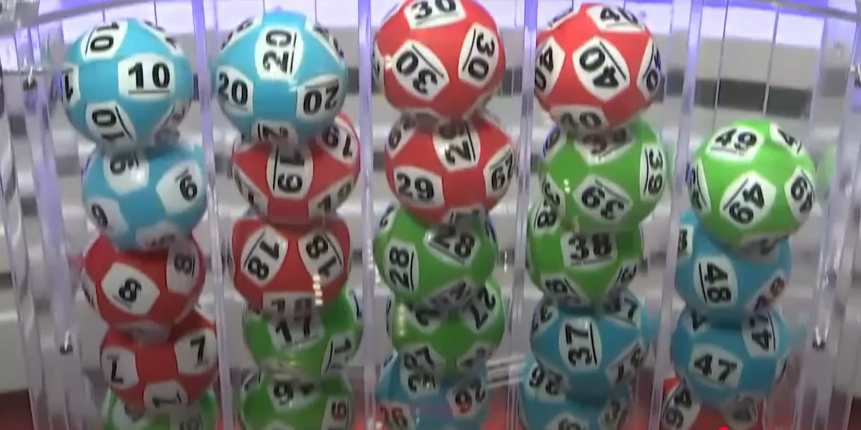

### Grouping the numbers in row (horizontally)

In [76]:
df_1sthalf['1_row'] = (df_1sthalf.iloc[:, 2:8] % 10 == 0).sum(axis=1)

# Create a list of row suffixes and a corresponding list of target values
suffixes = range(2, 11)  # for 2_row to 10_row
targets = [9, 8, 7, 6, 5, 4, 3, 2, 1]  # corresponding values for each row

for suffix, target in zip(suffixes, targets):
    condition = df_1sthalf.iloc[:, 2:8].isin([target + 10*i for i in range(0, 5)])
    df_1sthalf[f'{suffix}_row'] = condition.sum(axis=1)

In [77]:
df_row_dis=df_1sthalf.iloc[:,19:29].sum()
df_row_dis=df_row_dis.reset_index(name='dis')

In [78]:
#because 1_row has only 4 numbers, therefore need to do some manipulation
df_row_dis['dis'][0]=df_row_dis['dis'][0]/4
df_row_dis['dis'][1:]=df_row_dis['dis'][1:]/5

C:\Users\user\AppData\Local\Temp\ipykernel_3380\32392964.py:2: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df_row_dis['dis'][0]=df_row_dis['dis'][0]/4
C:\Users\user\AppData\Local\Temp\ipykernel_3380\32392964.py:2: SettingWithCopyWarning: 


In [79]:
df_row_dis

,index,dis
0,1_row,296.0
1,2_row,292.2
2,3_row,295.0
3,4_row,282.0
4,5_row,288.2
5,6_row,281.8
6,7_row,302.8
7,8_row,283.8
8,9_row,297.0
9,10_row,290.4


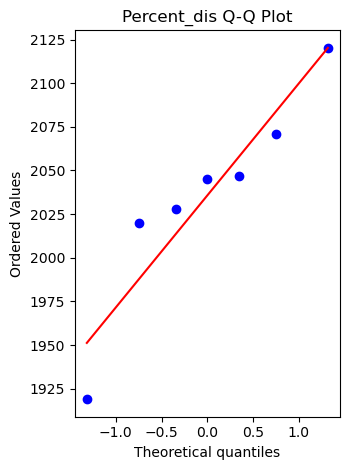

Shapiro-Wilk Test Statistic: 0.9140267695163348, p-value: 0.42445770867332266
The data is normally distributed (fail to reject H0).


In [95]:
#Are the numbers normally distributed?
dat = df_row_dis['dis']

# Step 1: Q-Q Plot
plt.subplot(1, 2, 2)
stats.probplot(data, dist="norm", plot=plt)
plt.title('Percent_dis Q-Q Plot')

plt.tight_layout()
plt.show()

# Step 2: Shapiro-Wilk Test
shapiro_stat, shapiro_p = stats.shapiro(data)
print(f'Shapiro-Wilk Test Statistic: {shapiro_stat}, p-value: {shapiro_p}')

# Interpretation of the p-value
alpha = 0.01
if shapiro_p > alpha:
    print("The data is normally distributed (fail to reject H0).")
else:
    print("The data is not normally distributed (reject H0).")

In [92]:
# t-test for df_row_dis
data = df_row_dis['dis']
name = df_row_dis['index']

# Function to perform one-sample t-test
def perform_ttest(value):
    t_stat, p_value = stats.ttest_1samp(data, value)
    return (value, t_stat, p_value)

# Use reduce to apply the t-test to each value in the data
results = [perform_ttest(value) for value in data]

# Print results
num=0
for value, t_stat, p_value in results:
    print(f"For {name[num]}")
    print(f"Comparing value {value} against the group mean:")
    print(f"  t-statistic: {t_stat:.4f}")
    print(f"  p-value: {p_value:.4f}")
    num+=1
    
    if p_value > 0.05:
        print("  Fail to reject the null hypothesis (H0): Not significantly different from the mean.\n")
    else:
        print("  Reject the null hypothesis (H0): Significantly different from the mean.\n")

For 1_row
Comparing value 296.0 against the group mean:
  t-statistic: -2.2890
  p-value: 0.0479
  Reject the null hypothesis (H0): Significantly different from the mean.

For 2_row
Comparing value 292.2 against the group mean:
  t-statistic: -0.5767
  p-value: 0.5782
  Fail to reject the null hypothesis (H0): Not significantly different from the mean.

For 3_row
Comparing value 295.0 against the group mean:
  t-statistic: -1.8384
  p-value: 0.0992
  Fail to reject the null hypothesis (H0): Not significantly different from the mean.

For 4_row
Comparing value 282.0 against the group mean:
  t-statistic: 4.0192
  p-value: 0.0030
  Reject the null hypothesis (H0): Significantly different from the mean.

For 5_row
Comparing value 288.2 against the group mean:
  t-statistic: 1.2256
  p-value: 0.2515
  Fail to reject the null hypothesis (H0): Not significantly different from the mean.

For 6_row
Comparing value 281.8 against the group mean:
  t-statistic: 4.1093
  p-value: 0.0026
  Reject t

##### 1_row appear significantly more in draws
##### 4_row appear significantly lesser in draws
##### 6_row appear significantly lesser in draws
##### 7_row appear significantly lesser in draws
##### 8_row appear significantly more in draws
##### 9_row appear significantly more in draws

### Grouping the numbers in column (vertically)

In [88]:
df_10_dis=pd.DataFrame()
df_10_dis=df_1sthalf.iloc[:,14:19].sum()
df_10_dis=df_10_dis.reset_index(name='dis')
df_10_dis
#df_row_dis=df_1sthalf.iloc[:,19:29].sum()
#df_row_dis=df_row_dis.reset_index(name='dis')

,index,dis
0,1-10,2926
1,11-20,2933
2,21-30,2946
3,31-40,2879
4,41-50,2566


In [89]:
#because 41-50 has only 9 numbers, therefore need to do some manipulation
df_10_dis['dis'][4]=df_10_dis['dis'][4]/9
df_10_dis['dis'][:4]=df_10_dis['dis'][:4]/10
df_10_dis

C:\Users\user\AppData\Local\Temp\ipykernel_3380\1147635588.py:2: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df_10_dis['dis'][4]=df_10_dis['dis'][4]/9
C:\Users\user\AppData\Local\Temp\ipykernel_3380\1147635588.py:2: SettingWithCopyWarning:

,index,dis
0,1-10,292.600000
1,11-20,293.300000
2,21-30,294.600000
3,31-40,287.900000
4,41-50,285.111111


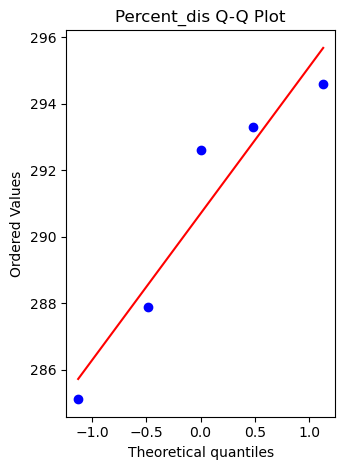

Shapiro-Wilk Test Statistic: 0.8957080353747359, p-value: 0.3866204942706366
The data is normally distributed (fail to reject H0).


In [96]:
#Are the numbers normally distributed?
data = df_10_dis['dis']

# Step 1: Q-Q Plot
plt.subplot(1, 2, 2)
stats.probplot(data, dist="norm", plot=plt)
plt.title('Percent_dis Q-Q Plot')

plt.tight_layout()
plt.show()

# Step 2: Shapiro-Wilk Test
shapiro_stat, shapiro_p = stats.shapiro(data)
print(f'Shapiro-Wilk Test Statistic: {shapiro_stat}, p-value: {shapiro_p}')

# Interpretation of the p-value
alpha = 0.01
if shapiro_p > alpha:
    print("The data is normally distributed (fail to reject H0).")
else:
    print("The data is not normally distributed (reject H0).")

In [97]:
# t-test for df_10_dis
data = df_10_dis['dis']
name = df_10_dis['index']

# Function to perform one-sample t-test
def perform_ttest(value):
    t_stat, p_value = stats.ttest_1samp(data, value)
    return (value, t_stat, p_value)

# Use reduce to apply the t-test to each value in the data
results = [perform_ttest(value) for value in data]

# Print results
num=0
for value, t_stat, p_value in results:
    print(f"For {name[num]}")
    print(f"Comparing value {value} against the group mean:")
    print(f"  t-statistic: {t_stat:.4f}")
    print(f"  p-value: {p_value:.4f}")
    num+=1
    
    if p_value > 0.05:
        print("  Fail to reject the null hypothesis (H0): Not significantly different from the mean.\n")
    else:
        print("  Reject the null hypothesis (H0): Significantly different from the mean.\n")

For 1-10
Comparing value 292.6 against the group mean:
  t-statistic: -1.0555
  p-value: 0.3507
  Fail to reject the null hypothesis (H0): Not significantly different from the mean.

For 11-20
Comparing value 293.3 against the group mean:
  t-statistic: -1.4448
  p-value: 0.2220
  Fail to reject the null hypothesis (H0): Not significantly different from the mean.

For 21-30
Comparing value 294.6 against the group mean:
  t-statistic: -2.1678
  p-value: 0.0960
  Fail to reject the null hypothesis (H0): Not significantly different from the mean.

For 31-40
Comparing value 287.9 against the group mean:
  t-statistic: 1.5585
  p-value: 0.1941
  Fail to reject the null hypothesis (H0): Not significantly different from the mean.

For 41-50
Comparing value 285.1111111111111 against the group mean:
  t-statistic: 3.1096
  p-value: 0.0359
  Reject the null hypothesis (H0): Significantly different from the mean.



#### 41-50 appear signifcantly lesser in draws

### Last draw winning number

In [103]:
df_fromlast=df_1sthalf['From Last'].value_counts().reset_index()
df_fromlast

,From Last,count
0,8,31
1,32,30
2,4,26
3,29,26
4,12,25
5,18,25
6,24,24
7,42,24
8,47,23
9,28,23


In [115]:
#merge the data that is calculated together, such as 30,32 and 12,39,49
data = df_fromlast

# Initialize a list to store the new rows
new_rows = []

# Iterate through each row in the original DataFrame
for index, row in data.iterrows():
    # Split the numbers by comma
    numbers = row['From Last'].split(',')
    count = row['count']
    
    # Create a new entry for each number
    for number in numbers:
        new_rows.append({'From Last': number.strip(), 'count': count})

# Create a new DataFrame from the list of new rows
result = pd.DataFrame(new_rows)

# Group by numbers and sum the times
result = result.groupby('From Last', as_index=False).sum().sort_values(by='count', ascending=False)

# Display the result
print(result)

   From Last  count
25        32     46
33         4     46
47         8     46
16        24     45
5         14     43
3         12     43
13        21     42
4         13     42
7         16     41
27        34     41
9         18     41
2         11     40
20        28     40
40        46     39
12        20     39
22         3     38
26        33     38
38        44     38
30        37     37
23        30     37
39        45     37
8         17     37
28        35     36
24        31     36
21        29     36
43        49     36
17        25     36
37        43     35
29        36     35
0          1     35
45         6     35
41        47     34
6         15     34
15        23     33
48         9     33
36        42     33
32        39     33
46         7     31
42        48     31
10        19     31
11         2     31
14        22     30
19        27     28
31        38     28
1         10     27
18        26     25
35        41     25
34        40     21
44         5     21


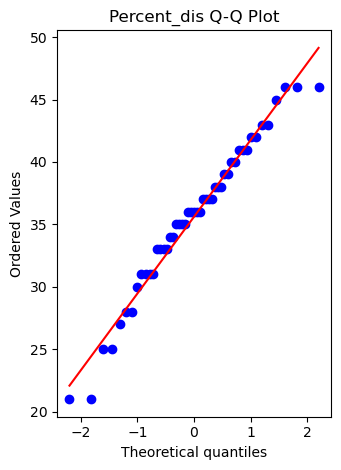

Shapiro-Wilk Test Statistic: 0.9712462816088162, p-value: 0.27127048718430624
The data is normally distributed (fail to reject H0).


In [116]:
#Are the numbers normally distributed?
data = result['count']

# Step 1: Q-Q Plot
plt.subplot(1, 2, 2)
stats.probplot(data, dist="norm", plot=plt)
plt.title('Percent_dis Q-Q Plot')

plt.tight_layout()
plt.show()

# Step 2: Shapiro-Wilk Test
shapiro_stat, shapiro_p = stats.shapiro(data)
print(f'Shapiro-Wilk Test Statistic: {shapiro_stat}, p-value: {shapiro_p}')

# Interpretation of the p-value
alpha = 0.01
if shapiro_p > alpha:
    print("The data is normally distributed (fail to reject H0).")
else:
    print("The data is not normally distributed (reject H0).")

In [117]:
mean = np.mean(result['count'])
std_dev = np.std(result['count'])

mean, std_dev

(np.float64(35.61224489795919), 6.009571707142723)

In [119]:
#since the numbers are normally distributed, we can then calculate z-score to see if there are any numbers have a significant difference
result['z-score']=result['count'].apply(lambda x: (x - mean)/std_dev)
result['z-score alpha 0.05']=result['z-score'].apply(lambda x: 1 if abs(x) > 1.645 else 0)
sign_diff_num=result[result['z-score alpha 0.05']==1]

print("The numbers that have a significant difference, with alpha = 0.05, are", *sign_diff_num['From Last'], sep=' ')

The numbers that have a significant difference, with alpha = 0.05, are 32 4 8 26 41 40 5


In [ ]:
#what if the extra number was included?

##### Some numbers do have a high chance on repeating itself from draws, could it be the tiny different from the weight or the shape of the balls that cause these minor differences?

### What about the distribution of each numbers?

In [153]:
percent_dis

,number,count,z-score,z-score alpha 0.05
0,49,325.0,2.047996,1
1,30,322.0,1.868261,1
2,24,320.0,1.748438,1
3,34,314.0,1.388969,0
4,4,312.0,1.269146,0
5,1,311.0,1.209234,0
6,28,311.0,1.209234,0
7,20,311.0,1.209234,0
8,32,306.0,0.909677,0
9,33,305.0,0.849765,0


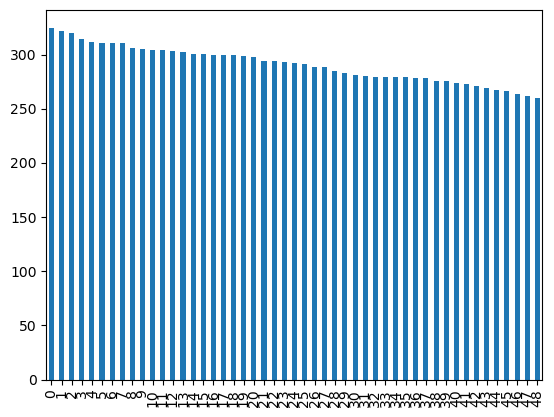

In [120]:
#the percentage distribution of each number
df_number_valuecounts=[df_1sthalf['1'].value_counts(),df_1sthalf['2'].value_counts(),df_1sthalf['3'].value_counts(),df_1sthalf['4'].value_counts(),df_1sthalf['5'].value_counts(),df_1sthalf['6'].value_counts()]
result_reduce=reduce(lambda x,y: x.add(y, fill_value=0), df_number_valuecounts)
percent_dis=(result_reduce).sort_values(ascending=False)
percent_dis=percent_dis.reset_index()
percent_dis.columns = ['number','count']
percent_dis['count'].plot.bar()

plt.show()

In [121]:
mean = np.mean(percent_dis['count'])
std_dev = np.std(percent_dis['count'])

mean, std_dev

(np.float64(290.81632653061223), 16.69128266844306)

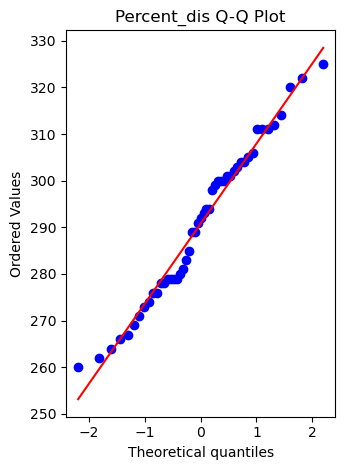

Shapiro-Wilk Test Statistic: 0.9717813784148892, p-value: 0.28469118900817747
The data is normally distributed (fail to reject H0).


In [122]:
#Are the numbers normally distributed?

# Step 1: Q-Q Plot
plt.subplot(1, 2, 2)
stats.probplot(percent_dis['count'], dist="norm", plot=plt)
plt.title('Percent_dis Q-Q Plot')

plt.tight_layout()
plt.show()

# Step 2: Shapiro-Wilk Test
shapiro_stat, shapiro_p = stats.shapiro(percent_dis['count'])
print(f'Shapiro-Wilk Test Statistic: {shapiro_stat}, p-value: {shapiro_p}')

# Interpretation of the p-value
alpha = 0.01
if shapiro_p > alpha:
    print("The data is normally distributed (fail to reject H0).")
else:
    print("The data is not normally distributed (reject H0).")

In [123]:
#since the numbers are normally distributed, we can then calculate z-score to see if there are any numbers have a significant difference
percent_dis['z-score']=percent_dis['count'].apply(lambda x: ( x - mean)/std_dev)
percent_dis['z-score alpha 0.05']=percent_dis['z-score'].apply(lambda x: 1 if abs(x) > 1.645 else 0)
sign_diff_num=percent_dis[percent_dis['z-score alpha 0.05']==1]

print("The numbers that have a significant difference, with alpha = 0.05, are", *sign_diff_num['number'], sep=' ')

The numbers that have a significant difference, with alpha = 0.05, are 49 30 24 41 19


In [124]:
percent_dis

,number,count,z-score,z-score alpha 0.05
0,49,325.0,2.047996,1
1,30,322.0,1.868261,1
2,24,320.0,1.748438,1
3,34,314.0,1.388969,0
4,4,312.0,1.269146,0
5,1,311.0,1.209234,0
6,28,311.0,1.209234,0
7,20,311.0,1.209234,0
8,32,306.0,0.909677,0
9,33,305.0,0.849765,0


### Would it be possible that, for some reasons, some numbers were only drew to a certain position?

In [138]:
print(df_1sthalf.iloc[:,2].value_counts(),
df_1sthalf.iloc[:,3].value_counts(),
df_1sthalf.iloc[:,4].value_counts(),
df_1sthalf.iloc[:,5].value_counts(),
df_1sthalf.iloc[:,6].value_counts(),
df_1sthalf.iloc[:,7].value_counts())

1
1     311
2     264
3     228
4     212
5     158
7     151
6     142
8     132
9     121
10    101
11     91
12     81
13     60
14     58
15     44
16     38
18     31
17     27
21     25
22     22
20     20
19     14
24      9
23      8
26      8
25      4
27      3
28      3
33      2
29      2
31      2
30      2
32      1
Name: count, dtype: int64 2
14    131
13    128
8     125
12    124
11    121
10    119
9     119
6     117
16    108
17    106
15    106
18    105
5      93
7      92
4      86
20     86
19     69
21     68
3      62
23     57
24     55
25     50
22     48
2      36
26     35
27     25
28     24
29     20
32     14
30     13
34      7
31      7
33      6
36      5
37      4
35      2
38      1
39      1
Name: count, dtype: int64 3
24    116
22    111
15    110
16    108
19    106
20    102
21    100
18     99
17     96
26     93
23     91
28     91
25     88
30     81
12     80
13     74
31     74
27     72
29     72
11     66
14     65
32     53
9      52
10

In [164]:
df = df_1sthalf.iloc[:, 2:8]

# Use value_counts and unstack to get counts of each number in each column
value_counts = df.apply(pd.Series.value_counts).fillna(0)

# Now we can filter based on the number of columns a number appears in
results = {}

# Iterate through the counts of columns (1 to 6)
for num_columns in range(1, 7):
    # Get numbers that appear in exactly `num_columns` different columns
    filtered_numbers = (value_counts > 0).sum(axis=1)

    # Extract the numbers that appear in the specified number of columns
    numbers = filtered_numbers[filtered_numbers == num_columns].index.tolist()
    
    # Store the results with their respective columns
    results[num_columns] = {
        number: list(df.columns[df.eq(number).any()]) for number in numbers
    }

# Print results
for n in range(1, 7):
    print(f"\nNumbers that appear in {n} columns:")
    for number, columns in results[n].items():
        print(f"Number: {number}, Columns: {columns}")


Numbers that appear in 1 columns:
Number: 1, Columns: ['1']
Number: 49, Columns: ['6']

Numbers that appear in 2 columns:
Number: 2, Columns: ['1', '2']
Number: 48, Columns: ['5', '6']

Numbers that appear in 3 columns:
Number: 3, Columns: ['1', '2', '3']
Number: 45, Columns: ['4', '5', '6']
Number: 46, Columns: ['4', '5', '6']
Number: 47, Columns: ['4', '5', '6']

Numbers that appear in 4 columns:
Number: 4, Columns: ['1', '2', '3', '4']
Number: 5, Columns: ['1', '2', '3', '4']
Number: 6, Columns: ['1', '2', '3', '4']
Number: 40, Columns: ['3', '4', '5', '6']
Number: 41, Columns: ['3', '4', '5', '6']
Number: 42, Columns: ['3', '4', '5', '6']
Number: 43, Columns: ['3', '4', '5', '6']
Number: 44, Columns: ['3', '4', '5', '6']

Numbers that appear in 5 columns:
Number: 7, Columns: ['1', '2', '3', '4', '5']
Number: 8, Columns: ['1', '2', '3', '4', '5']
Number: 9, Columns: ['1', '2', '3', '4', '5']
Number: 11, Columns: ['1', '2', '3', '4', '5']
Number: 12, Columns: ['1', '2', '3', '4', '5

#### Some numbers only would be drew in certain positions, since 2008
#### for eg.
#### number 1 would only appear in the 1st draw
#### number49 would only appear in the 6th draw

# Potential Features

#### Done
- low
- high
- odd
- even
- 5 groups (1-10, 11-20, 21-30, 31,40, 41-49) (vertical initial placement of the powerballs)
- 10 groups (horizontal initial placement of the powerballs)
- 7 groups (1-7, 8-14 ... 43-49) (evenly categorise 49 powerballs)
- last draw winning numbers
- significant difference of each powerballs' being drew
- the sequence of the powerballs being drew: some only would be drew as the first ball, some only as the last etc.

#### Not Done

- last 10 draw winning numbers
- last 20 draw winning numbers
- median of winning numbers
- range of winning numbers (max - min)
- hot numbers
- cold numbers
- consecutive numbers
- month
- season
- numbers that appear together

# Define the output of the ML model
- predict all 7 numbers (most difficult)
- predict 7 numbers for the next 3,5,7,10 draws (more room for the prediction)
- select 1 number only for the next draw (1/47, ~2% chance to guess correctly?)
- guess only 3 numbers out of the 6 (7th price)
- guess only 4 numbers out of the 6 (5th price)

#### 頭獎	選中6個「攪出號碼」	獎金會因應該期獲中頭獎注數而有所不同，每期頭獎基金訂為不少於港幣500萬元。
#### 二獎	選中5個「攪出號碼」+「特別號碼」	獎金會因應該期獲中二獎注數而有所不同
#### 三獎	選中5個「攪出號碼」	獎金會因應該期獲中三獎注數而有所不同
#### 四獎	選中4個「攪出號碼」+「特別號碼」	固定獎金港幣$4,800

#### 五獎	選中4個「攪出號碼」	固定獎金港幣$320

#### 六獎	選中3個「攪出號碼」+「特別號碼」	固定獎金港幣$160

#### 七獎	選中3個「攪出號碼」	固定獎金港幣$20